In [1]:
import numpy as np

we are creating a dataset with 1 feature, so it will have 2 parameters. also our dataset will have 100 samples

In [2]:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)
y = w1 + w0 * X + np.random.randn(n,)

In [3]:
print(X.shape)
print(y.shape)

(100,)
(100,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.20, random_state=42)
print(X_test.shape, y_test.shape, X_train.shape,y_train.shape)

(20,) (20,) (80,) (80,)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
X_train[:5]

array([8.7250058 , 6.51564176, 4.1841383 , 5.59345506, 0.09618719])

In [7]:
y_train[:5]

array([38.0220415 , 28.86817601, 19.53735418, 25.52728742,  2.90344185])

## lets visualise the tarining set

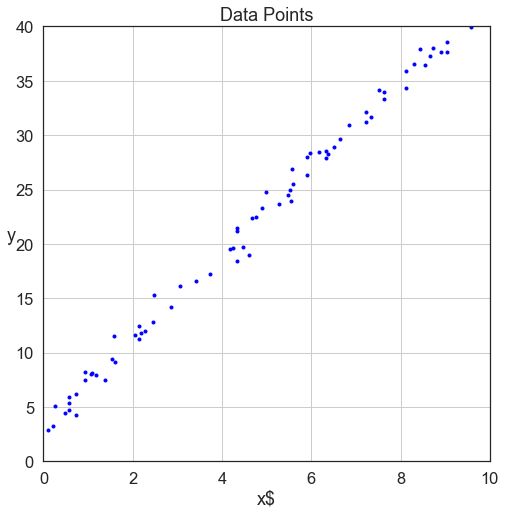

In [8]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("x$",fontsize = 18)
plt.ylabel("y",rotation = 0, fontsize = 18)
plt.axis([0,10,0,40])
plt.show()

In [9]:
np.column_stack((np.ones(X.shape[0]),X))

array([[1.        , 2.71061271],
       [1.        , 5.55885843],
       [1.        , 7.34680303],
       [1.        , 4.33912115],
       [1.        , 8.96036903],
       [1.        , 7.21648461],
       [1.        , 4.89171354],
       [1.        , 2.13141093],
       [1.        , 1.61097474],
       [1.        , 1.52659648],
       [1.        , 9.03295367],
       [1.        , 5.47101507],
       [1.        , 2.20210339],
       [1.        , 4.97925666],
       [1.        , 9.62972596],
       [1.        , 4.25709207],
       [1.        , 1.0570388 ],
       [1.        , 6.18343427],
       [1.        , 2.83155405],
       [1.        , 0.92251124],
       [1.        , 5.51679278],
       [1.        , 6.37064414],
       [1.        , 5.64543941],
       [1.        , 9.04751251],
       [1.        , 2.27973824],
       [1.        , 9.58045622],
       [1.        , 4.1841383 ],
       [1.        , 4.76553887],
       [1.        , 0.56624155],
       [1.        , 2.44851986],
       [1.

In [10]:
def add_dummy_feature(x):
    '''adds dummy feature to the dataset
     Args:
       x: Training dataset
     Returns:
          Training dataset with an addition of dummy features
     '''
    #np.ones(x.shape[0]) creates a vector of 1's having the same no.of rows as no.of samples in dataset
    return np.column_stack((np.ones(x.shape[0]),x))

In [11]:
add_dummy_feature(np.array([1,3,4]))#test case

array([[1., 1.],
       [1., 3.],
       [1., 4.]])

## Model

Linear regression model uses linear combination of features to obtain output labels.In vectorized form, thi can be written as $y=Xw$

In [12]:
def predict(X,w):
    '''Predictioon of output label for a given input
        Args:
           X: Feature matrix of shape(n,m+1)
           w: weight vector of shape(m+1,n)
        Returns:
            y:Predicted label vector of shape(n,)
    '''
    #check that feature matrix and weight vector have compactible shapes
    assert X.shape[-1]==w.shape[0]

    y = X @ w
    return y

In [14]:
def loss(features, labels, weights):
    e = predict(features, weights) - labels
    loss = (1/2) * (np.transpose(e) @ e)
    return loss

In [1]:
import numpy as np
w1=5
w0=6
n=200
X=10*np.random.rand(n,)
y=w0+w1*X+np.random.randn(n,)
print("Shape of feature matrix",X.shape)
print("Shape of label vector",y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,

                                                  test_size=0.2,random_state=36)

print("shape of training feature matrix", X_train.shape)
print("shape of test feature matrix",X_test.shape)
print("shape of training label",y_train.shape)
print("shape of test label",y_test.shape)

Shape of feature matrix (200,)
Shape of label vector (200,)
shape of training feature matrix (160,)
shape of test feature matrix (40,)
shape of training label (160,)
shape of test label (40,)
